<a href="https://colab.research.google.com/github/varshuka02/OasisInfobyte-Internship/blob/main/EMAIL_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMAIL SPAM DETECTION WITH MACHINE LEARNING**

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data=pd.read_csv('/content/spam.csv',encoding='latin-1')
data


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

data = data.rename(columns={"v1": "label", "v2": "text"})

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(data['label'])
labels = to_categorical(labels)

In [ ]:
lemma = WordNetLemmatizer()
sentences = []

for sent in data['text']:
    sent = re.sub('[^A-Za-z]', ' ', sent)
    sent = sent.lower()
    words = word_tokenize(sent)
    words = [lemma.lemmatize(word) for word in words if word not in stopwords.words('english')]
    sentences.append(' '.join(words))

In [ ]:
vocab_size = 10000
one_hot_sent = [one_hot(sentence, vocab_size) for sentence in sentences]


In [ ]:
max_len = 80
padded_sequences = pad_sequences(one_hot_sent, maxlen=max_len)

In [ ]:
feature_train, feature_test, label_train, label_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=7)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=max_len))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 80, 64)            640000    
                                                                 
 lstm_18 (LSTM)              (None, 80, 100)           66000     
                                                                 
 dropout_16 (Dropout)        (None, 80, 100)           0         
                                                                 
 lstm_19 (LSTM)              (None, 50)                30200     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 2)                 102       
                                                                 
Total params: 736302 (2.81 MB)
Trainable params: 7363

In [ ]:
history = model.fit(feature_train, label_train, epochs=10, batch_size=64, validation_data=(feature_test, label_test))

Epoch 1/10
70/70 [==============================] - 21s 230ms/step - loss: 0.2849 - accuracy: 0.9123 - val_loss: 0.0897 - val_accuracy: 0.9785
Epoch 2/10
70/70 [==============================] - 15s 219ms/step - loss: 0.0608 - accuracy: 0.9859 - val_loss: 0.0532 - val_accuracy: 0.9865
Epoch 3/10
70/70 [==============================] - 17s 246ms/step - loss: 0.0263 - accuracy: 0.9937 - val_loss: 0.0458 - val_accuracy: 0.9865
Epoch 4/10
70/70 [==============================] - 16s 232ms/step - loss: 0.0163 - accuracy: 0.9973 - val_loss: 0.0439 - val_accuracy: 0.9857
Epoch 5/10
70/70 [==============================] - 15s 215ms/step - loss: 0.0110 - accuracy: 0.9984 - val_loss: 0.0447 - val_accuracy: 0.9865
Epoch 6/10
70/70 [==============================] - 15s 217ms/step - loss: 0.0091 - accuracy: 0.9982 - val_loss: 0.0425 - val_accuracy: 0.9874
Epoch 7/10
70/70 [==============================] - 15s 217ms/step - loss: 0.0063 - accuracy: 0.9993 - val_loss: 0.0472 - val_accuracy: 0.9865

In [ ]:
loss, accuracy = model.evaluate(feature_test, label_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

35/35 [==============================] - 1s 33ms/step - loss: 0.0554 - accuracy: 0.9812
Test Accuracy: 98.12%


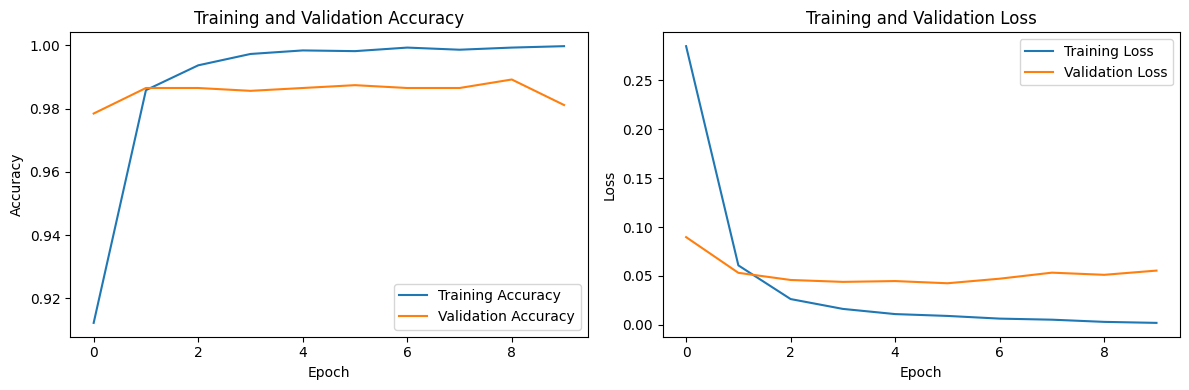

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()